<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/notebooks/videos/Practica_3_1_Analisis_Exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Datos

## Dataset: Autos
Conjunto de datos de autos con características que incluyen marca, modelo, año, motor y otras propiedades del vehículo

In [ ]:
import kagglehub
path = kagglehub.dataset_download("CooperUnion/cardataset")
print("Path to dataset files:", path)

100%|██████████| 103k/103k [00:00<00:00, 46.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1


In [ ]:
path = kagglehub.dataset_download("CooperUnion/cardataset")
print("Path to dataset files:", path)
df_autos = pd.read_csv("/kaggle/input/cardataset/data.csv")
df_autos.head(2)

Path to dataset files: /kaggle/input/cardataset


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


# Exploración inicial del dataset

In [ ]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df_autos.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Renombrar las columnas del dataset

In [ ]:
df_autos = df_autos.rename(columns={"Make": "Marca","Model": "Modelo","Year": "Año",
                                    "Engine Fuel Type": "Tipo de combustible",
                                    "Engine HP": "Potencia (HP)","Engine Cylinders": "Cilindros",
                                    "Transmission Type": "Transmisión","Driven_Wheels": "Modo de tracción",
                                    "Number of Doors": "Número de puertas","Market Category": "Categoría de mercado",
                                    "Vehicle Size": "Tamaño del vehículo","Vehicle Style": "Estilo del vehículo",
                                    "highway MPG": "Rendimiento carretera (MPG)","city mpg": "Rendimiento ciudad (MPG)",
                                    "Popularity": "Popularidad","MSRP": "Precio"})
df_autos.head(5)

,Marca,Modelo,Año,Tipo de combustible,Potencia (HP),Cilindros,Transmisión,Modo de tracción,Número de puertas,Categoría de mercado,Tamaño del vehículo,Estilo del vehículo,Rendimiento carretera (MPG),Rendimiento ciudad (MPG),Popularidad,Precio
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Eliminación de filas duplicadas.
En un dataset grande es común encontrar registros repetidos. Esto puede comprobarse de la siguiente forma:

In [ ]:
df_autos.shape

(11914, 16)

In [ ]:
filas_duplicadas = df_autos[df_autos.duplicated()]
print("Cantidad de filas duplicadas: ", len(filas_duplicadas))

Cantidad de filas duplicadas:  715


In [ ]:
filas_duplicadas

,Marca,Modelo,Año,Tipo de combustible,Potencia (HP),Cilindros,Transmisión,Modo de tracción,Número de puertas,Categoría de mercado,Tamaño del vehículo,Estilo del vehículo,Rendimiento carretera (MPG),Rendimiento ciudad (MPG),Popularidad,Precio
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [ ]:
df_autos = df_autos.drop_duplicates()
print("Cantidad de filas: ", len(df_autos))

Cantidad de filas:  11199


## Eliminación de valores faltantes.

In [ ]:
# Revisamos la cantidad de valores nulos por columna (en %)
print(round(df_autos.isnull().sum()/len(df_autos)*100,2))

Marca                           0.00
Modelo                          0.00
Año                             0.00
Tipo de combustible             0.03
Potencia (HP)                   0.62
Cilindros                       0.27
Transmisión                     0.00
Modo de tracción                0.00
Número de puertas               0.05
Categoría de mercado           30.15
Tamaño del vehículo             0.00
Estilo del vehículo             0.00
Rendimiento carretera (MPG)     0.00
Rendimiento ciudad (MPG)        0.00
Popularidad                     0.00
Precio                          0.00
dtype: float64


In [ ]:
# Eliminamos la columna con demasiados valores faltantes
df_autos = df_autos.drop(columns=["Categoría de mercado"])

In [ ]:
# Eliminamos las filas con valores faltantes en el resto de las columnas
df_autos = df_autos.dropna()

In [ ]:
# Verificamos la cantidad de datos nuevamente
print("Cantidad de filas: ", len(df_autos))

Cantidad de filas:  11097


# Frecuencias e Histogramas

## Variables cualitativas

In [ ]:
df_autos["Estilo del vehículo"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [ ]:
freq_estilo =df_autos["Estilo del vehículo"].value_counts(normalize=True)
print(freq_estilo.head())

Estilo del vehículo
Sedan              0.253041
4dr SUV            0.218618
Coupe              0.103992
Convertible        0.066775
Crew Cab Pickup    0.059025
Name: proportion, dtype: float64


In [ ]:
freq_estilo = df_autos["Estilo del vehículo"].value_counts().rename("freq_abs").to_frame()
freq_estilo["freq_rel"] = (freq_estilo["freq_abs"] / freq_estilo["freq_abs"].sum()).round(2)
freq_estilo["freq_pct"] = 100 * freq_estilo["freq_rel"]
print(freq_estilo.head())

                     freq_abs  freq_rel  freq_pct
Estilo del vehículo                              
Sedan                    2808      0.25      25.0
4dr SUV                  2426      0.22      22.0
Coupe                    1154      0.10      10.0
Convertible               741      0.07       7.0
Crew Cab Pickup           655      0.06       6.0


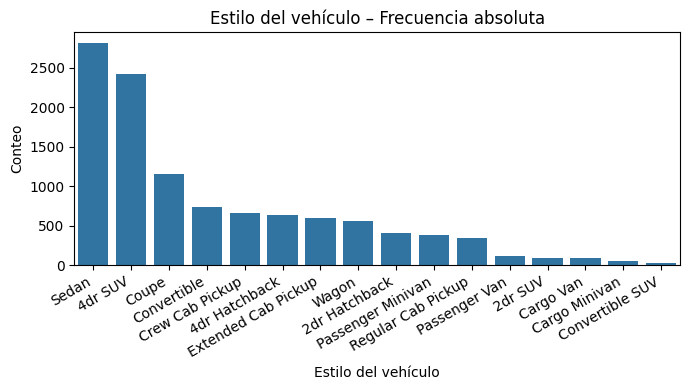

In [ ]:
# Barras (frecuencia absoluta)
plt.figure(figsize=(7,4))
sns.countplot(data=df_autos, x="Estilo del vehículo",order = df_autos["Estilo del vehículo"].value_counts().index)
plt.title("Estilo del vehículo – Frecuencia absoluta")
plt.xlabel("Estilo del vehículo"); plt.ylabel("Conteo")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

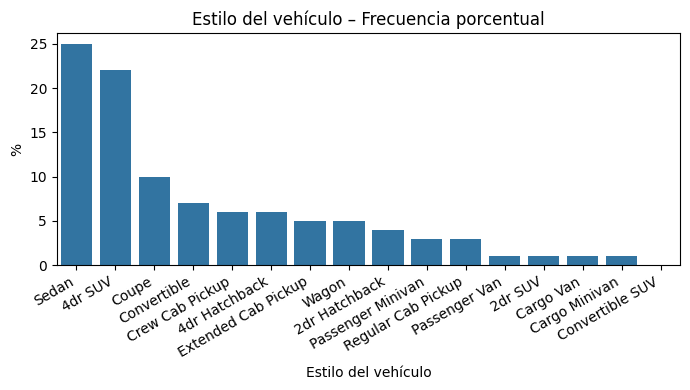

In [ ]:
# Barras (porcentaje)
plt.figure(figsize=(7,4))
order_vs = df_autos["Estilo del vehículo"].value_counts().index
sns.barplot(x=freq_estilo.index, y=freq_estilo["freq_pct"].values, order=order_vs)
plt.title("Estilo del vehículo – Frecuencia porcentual")
plt.xlabel("Estilo del vehículo"); plt.ylabel("%")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

## Variables cuantitativas discreta

        f        fr       pct
Año                          
1990   77  0.006939  0.693881
1991  103  0.009282  0.928179
1992  127  0.011445  1.144453
1993  159  0.014328  1.432820
1994  128  0.011535  1.153465


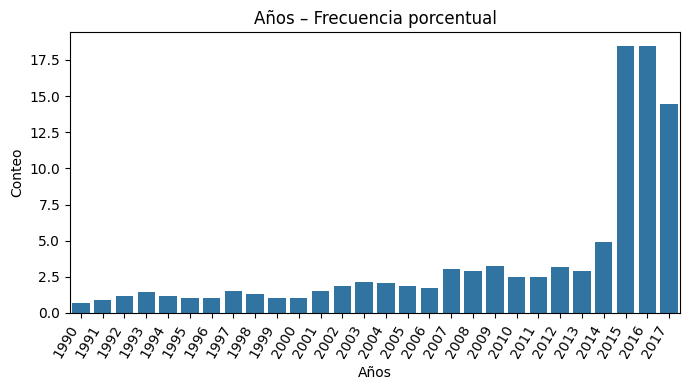

In [ ]:
freq_year = df_autos["Año"].value_counts().sort_index().rename("f").to_frame()
freq_year["fr"] = freq_year["f"] / freq_year["f"].sum()
freq_year["pct"] = 100 * freq_year["fr"]
print(freq_year.head())

plt.figure(figsize=(7,4))
sns.barplot(x=freq_year.index, y=freq_year["pct"].values)
plt.title("Años – Frecuencia porcentual")
plt.xlabel("Años")
plt.ylabel("Conteo")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

## Variables cuantitativas continuas

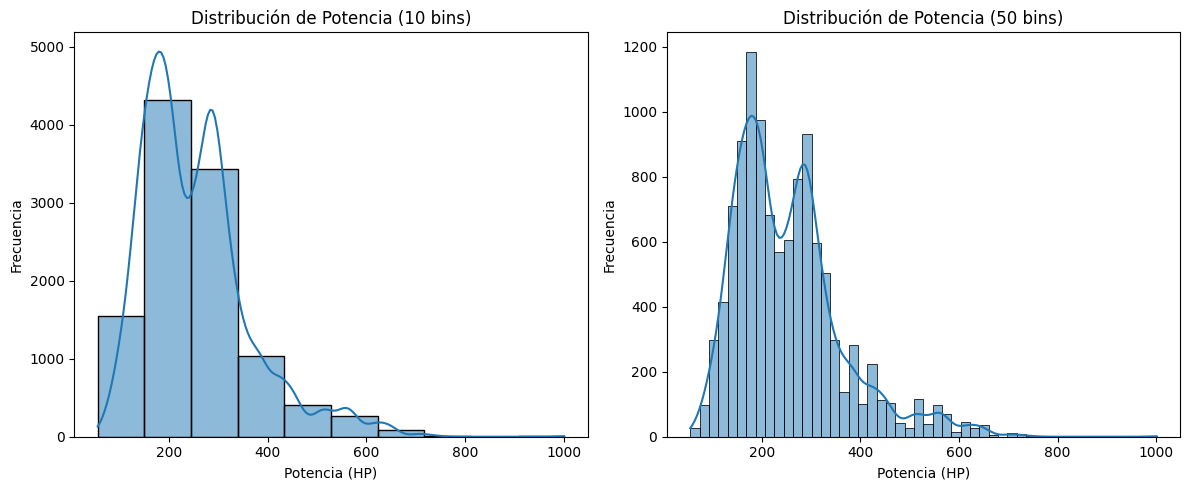

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1 (menos bins)
sns.histplot(df_autos["Potencia (HP)"], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Potencia (10 bins)')
axes[0].set_xlabel('Potencia (HP)')
axes[0].set_ylabel('Frecuencia')

# Histograma 2 (más bins)
sns.histplot(df_autos["Potencia (HP)"], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución de Potencia (50 bins)')
axes[1].set_xlabel('Potencia (HP)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Valores centrales

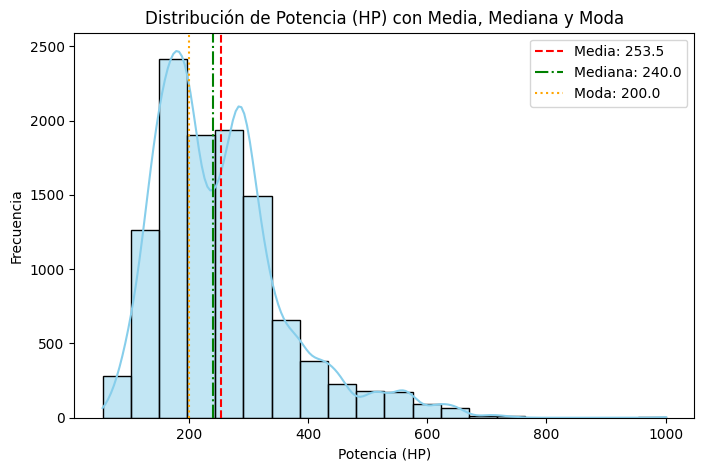

In [ ]:
# Calcular media, mediana y moda
media = df_autos["Potencia (HP)"].mean()
mediana = df_autos["Potencia (HP)"].median()
moda = df_autos["Potencia (HP)"].mode()[0]

# Crear histograma
plt.figure(figsize=(8,5))
sns.histplot(df_autos["Potencia (HP)"], bins=20, kde=True, color='skyblue')

# Agregar líneas verticales
plt.axvline(media, color='red', linestyle='--',label=f'Media: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='-.',label=f'Mediana: {mediana:.1f}')
plt.axvline(moda, color='orange', linestyle=':',label=f'Moda: {moda:.1f}')

# Títulos y etiquetas
plt.title('Distribución de Potencia (HP) con Media, Mediana y Moda')
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Medidas de posición

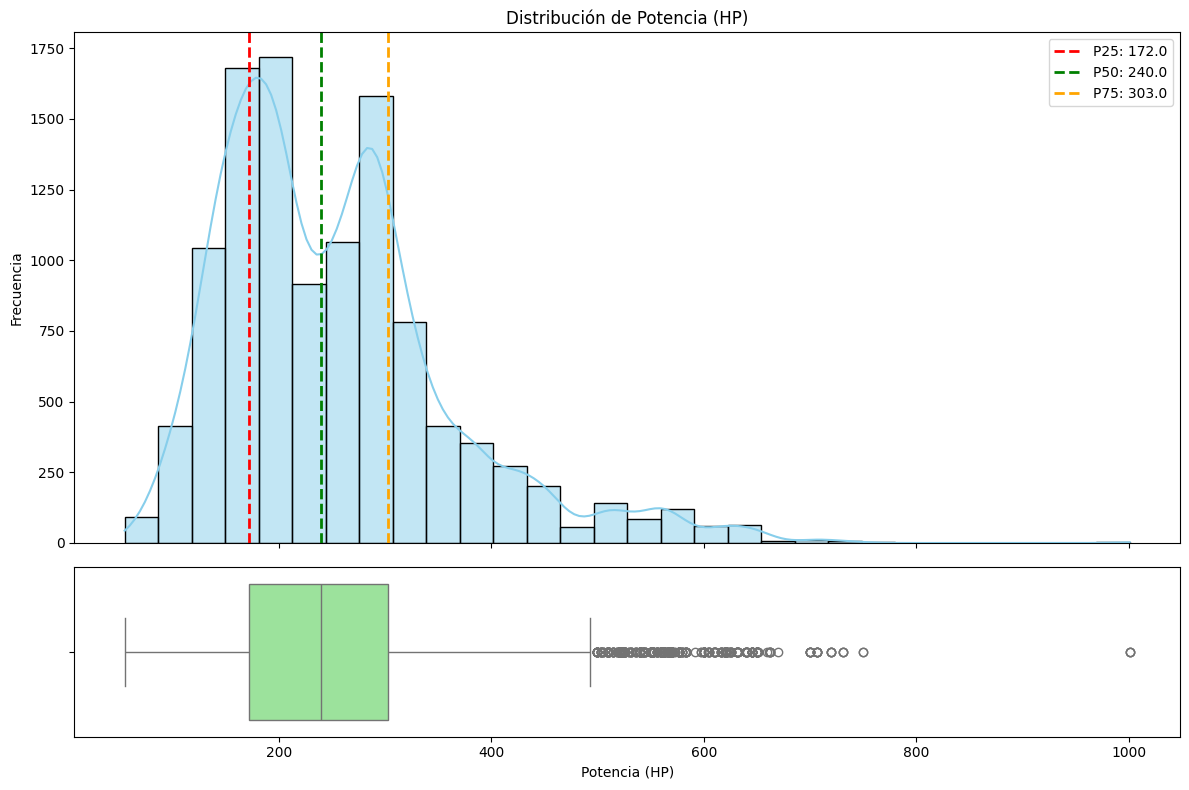

In [ ]:
# Percentiles
percentiles = [25, 50, 75]
perc_values = np.percentile(df_autos["Potencia (HP)"], percentiles)

# Crear figura con 2 filas: histograma y boxplot
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True,
                         gridspec_kw={'height_ratios': [3, 1]})
# Histograma con percentiles
sns.histplot(df_autos["Potencia (HP)"], bins=30, kde=True, ax=axes[0],
             color="skyblue")

colors = ['red', 'green', 'orange']
for p, val, color in zip(percentiles, perc_values,colors):
    axes[0].axvline(val, color=color, linewidth=2, linestyle="--",
                    label=f"P{p}: {val:.1f}")
axes[0].set_title("Distribución de Potencia (HP)")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot en la misma escala
sns.boxplot(x=df_autos["Potencia (HP)"], ax=axes[1], color="lightgreen")
axes[1].set_xlabel("Potencia (HP)")

plt.tight_layout()
plt.show()

# Medidas de dispersión

In [ ]:
data = df_autos["Potencia (HP)"]

# Calcular varianza, desvio estándar y MAD
varianza = np.var(data)
desvio = np.std(data)
media = np.mean(data)
mad = np.median(np.abs(data - media))  # MAD con respecto a la mediana

print(f"Varianza = {varianza:.1f}, Desvío estándar = {desvio:.1f}, MAD = {mad:.1f}")

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print(f"Q1 = {Q1:.1f}, Q3 = {Q3:.1f}, IQR = {IQR:.1f}")

Varianza = 12135.2, Desvío estándar = 110.2, MAD = 69.5
Q1 = 172.0, Q3 = 303.0, IQR = 131.0


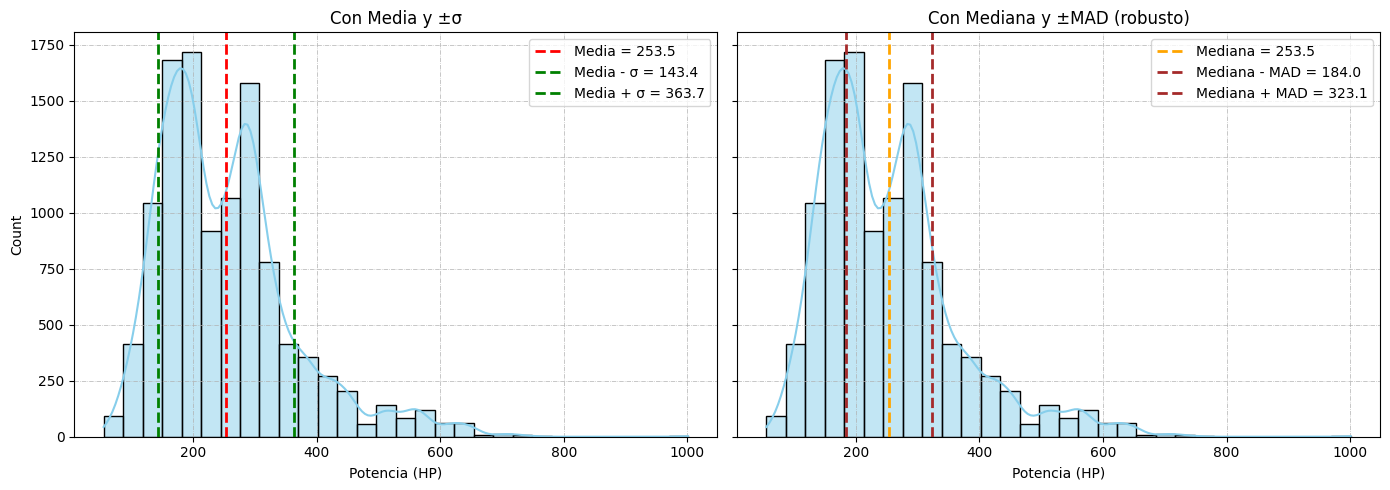

In [ ]:
# Figura comparativa: Media+σ vs Mediana+MAD
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# (a) Media + σ
sns.histplot(data, bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].axvline(media, color="red", linewidth=2, linestyle="--", label=f"Media = {media:.1f}")
axes[0].axvline(media-desvio, color="green", linewidth=2, linestyle="--", label=f"Media - σ = {media-desvio:.1f}")
axes[0].axvline(media+desvio, color="green", linewidth=2, linestyle="--", label=f"Media + σ = {media+desvio:.1f}")
axes[0].set_title("Con Media y ±σ")
axes[0].legend()
axes[0].grid(linestyle='-.', linewidth=0.5)

# (b) Mediana + MAD
sns.histplot(data, bins=30, kde=True, color="skyblue", ax=axes[1])
axes[1].axvline(media, color="orange", linewidth=2, linestyle="--", label=f"Mediana = {media:.1f}")
axes[1].axvline(media-mad, color="brown", linewidth=2, linestyle="--", label=f"Mediana - MAD = {media-mad:.1f}")
axes[1].axvline(media+mad, color="brown", linewidth=2, linestyle="--", label=f"Mediana + MAD = {media+mad:.1f}")
axes[1].set_title("Con Mediana y ±MAD (robusto)")
axes[1].legend()
axes[1].grid(linestyle='-.', linewidth=0.5)

plt.tight_layout()
plt.show()

## Boxplot

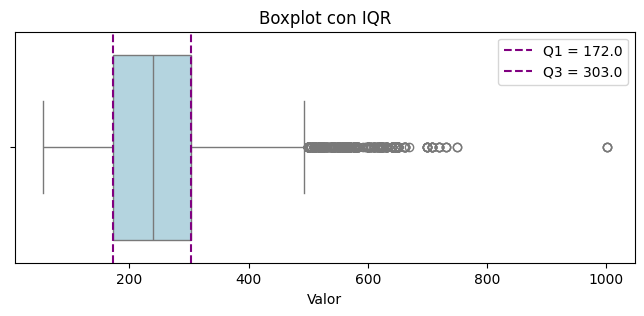

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=data, color="lightblue")
plt.axvline(Q1, color="purple", linestyle="--", label=f"Q1 = {Q1:.1f}")
plt.axvline(Q3, color="purple", linestyle="--", label=f"Q3 = {Q3:.1f}")
plt.title("Boxplot con IQR")
plt.xlabel("Valor")
plt.legend()
plt.show()

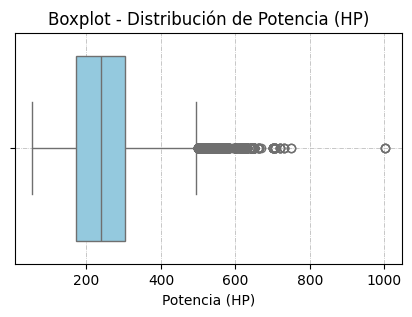

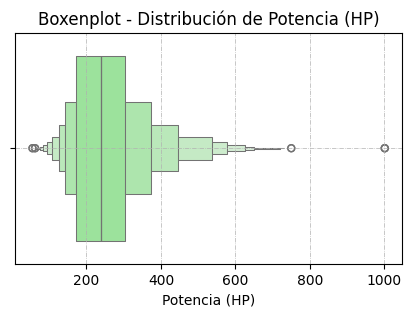

In [ ]:
# Boxplot clásico
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_autos["Potencia (HP)"], color="skyblue")
plt.title("Boxplot - Distribución de Potencia (HP)")
plt.xlabel("Potencia (HP)")
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()

print()

# Boxenplot
plt.figure(figsize=(5, 3))
sns.boxenplot(x=df_autos["Potencia (HP)"], color="lightgreen")
plt.title("Boxenplot - Distribución de Potencia (HP)")
plt.xlabel("Potencia (HP)")
plt.grid(linestyle='-.', linewidth=0.5)
plt.show()

# Datos multivariados: Frecuencia conjuntae

## Relación numérica–numérica

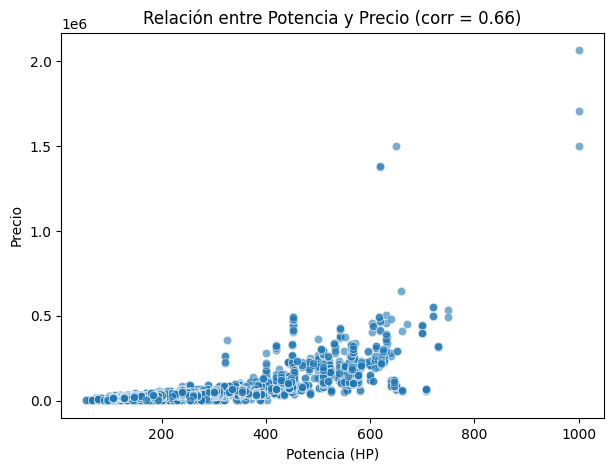

In [ ]:
# 1. Scatterplot
corr = df_autos["Potencia (HP)"].corr(df_autos["Precio"],method='pearson')

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_autos, x="Potencia (HP)", y="Precio", alpha=0.6)
plt.title(f"Relación entre Potencia y Precio (corr = {corr:.2f})")
plt.show()

Filtramos los datos: Ejemplo 1

In [ ]:
df_filt = df_autos.copy() # Hacemos una copia de los datos

Estilo del vehículo

In [ ]:
df_filt['Estilo del vehículo'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [ ]:
df_filt = df_filt[df_filt['Estilo del vehículo']=='Sedan']

Tamaño del vehículo

In [ ]:
df_filt['Tamaño del vehículo'].unique()

array(['Midsize', 'Compact', 'Large'], dtype=object)

In [ ]:
df_filt = df_filt[df_filt['Tamaño del vehículo']!='Large']

Año del vehículo

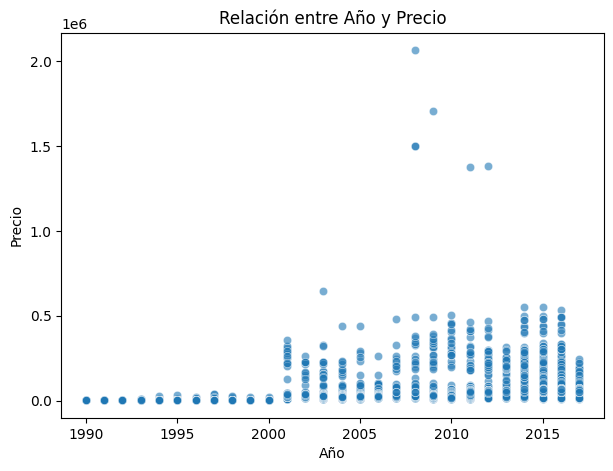

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_autos,
    x="Año",
    y="Precio",
    alpha=0.6
)
#plt.ylim(0, 1000000)
plt.title("Relación entre Año y Precio")
plt.show()

In [ ]:
df_filt = df_filt[df_filt['Año']>2000]

Volvemos a calcular la correlacion, ahora con los datos filtrados

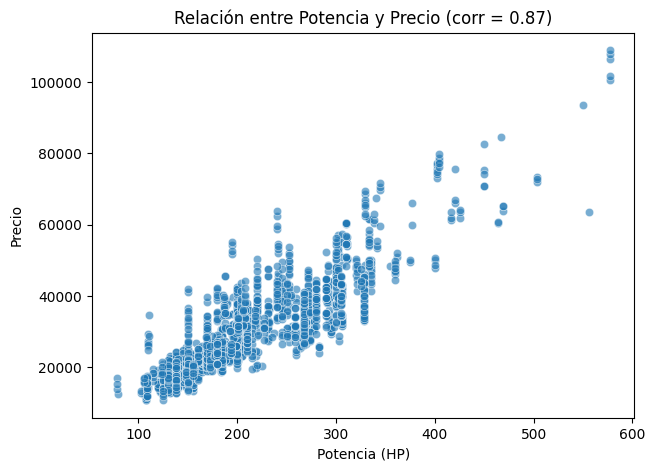

In [ ]:
corr = df_filt["Potencia (HP)"].corr(df_filt["Precio"])

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_filt, x="Potencia (HP)", y="Precio", alpha=0.6)
plt.title(f"Relación entre Potencia y Precio (corr = {corr:.2f})")
plt.show()

Filtramos los datos Ejemplo 2

In [ ]:
df_filt2 = df_autos.copy()
df_filt2 = df_filt2[df_filt2['Estilo del vehículo']=='Sedan']
df_filt2 = df_filt2[df_filt2['Año']>2000]

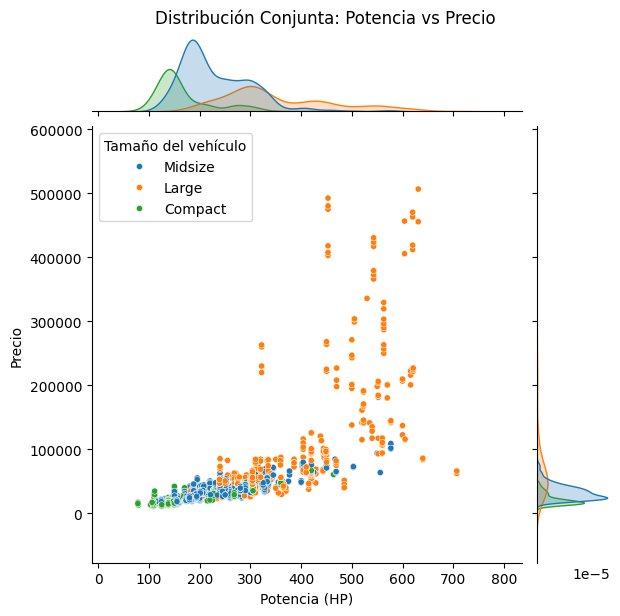

In [ ]:
# 2. Histograma 2D (hexbin) con jointplot
sns.jointplot(data=df_filt2,x="Potencia (HP)",y="Precio",s=20,hue="Tamaño del vehículo")
plt.suptitle("Distribución Conjunta: Potencia vs Precio", y=1.02)
plt.show()

## Correlación entre variables

In [ ]:
# Pearson: relación lineal
pearson_corr = df_autos["Potencia (HP)"].corr(df_autos["Precio"], method="pearson")

# Spearman: relación por rangos (no lineal)
spearman_corr = df_autos["Potencia (HP)"].corr(df_autos["Precio"], method="spearman")

print(f"Correlación de Pearson: {pearson_corr:.3f}")
print(f"Correlación de Spearman: {spearman_corr:.3f}")


Correlación de Pearson: 0.659
Correlación de Spearman: 0.834


Matriz de correlación

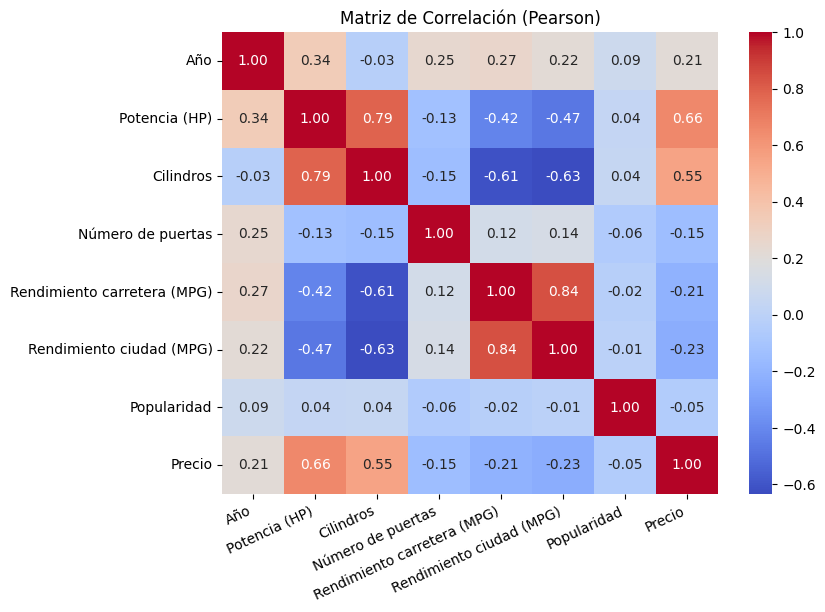

In [ ]:
# Seleccionamos solo columnas numéricas
df_num = df_autos.select_dtypes(include="number")
# Matriz de correlación de Pearson
corr_matrix = df_num.corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación (Pearson)")
plt.xticks(rotation=25, ha="right")
plt.show()

## Relación categórica–numérica

Potencia X Tamaño del vehículo - Boxplot

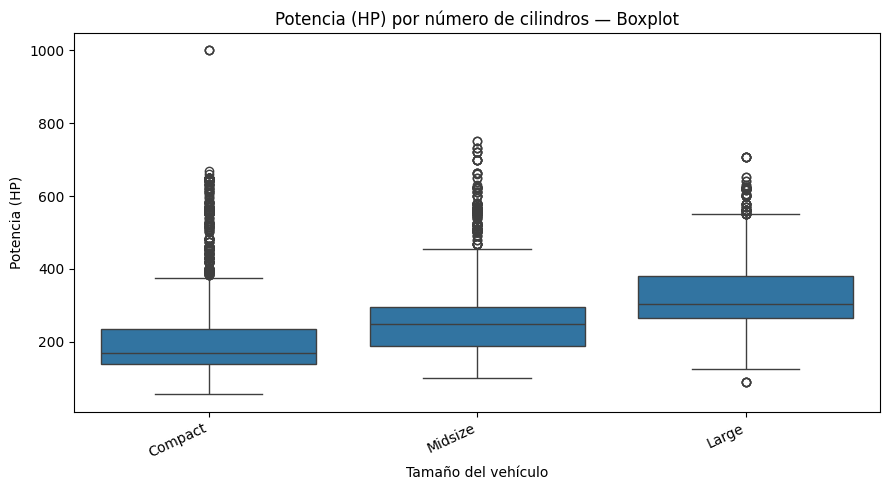

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df_autos, x="Tamaño del vehículo", y="Potencia (HP)", showfliers=True)
plt.title("Potencia (HP) por número de cilindros — Boxplot")
plt.xlabel("Tamaño del vehículo")
plt.ylabel("Potencia (HP)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

Potencia X Tamaño del vehículo - Histogramas

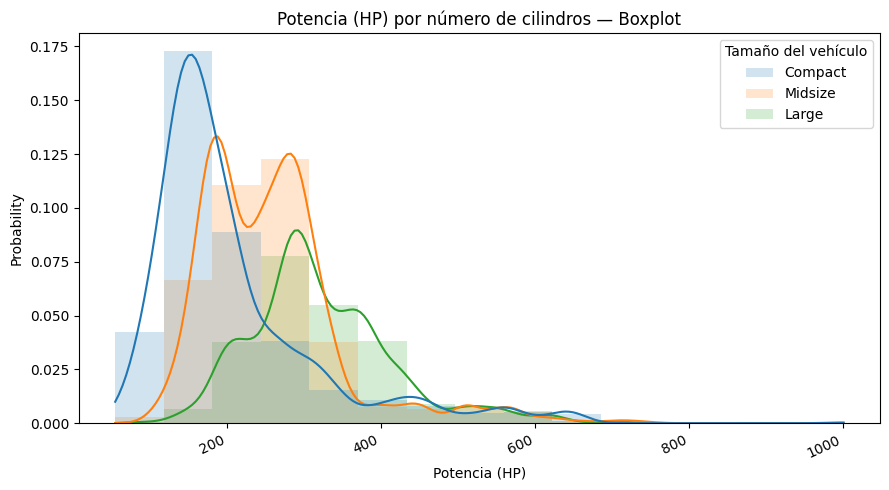

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df_autos, x="Potencia (HP)", hue='Tamaño del vehículo',
             bins='sturges', stat='probability',
             alpha=0.2,kde=True, edgecolor='none')
plt.title("Potencia (HP) por número de cilindros — Boxplot")
plt.xlabel("Potencia (HP)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

Potencia X Cantidad de Cilindros

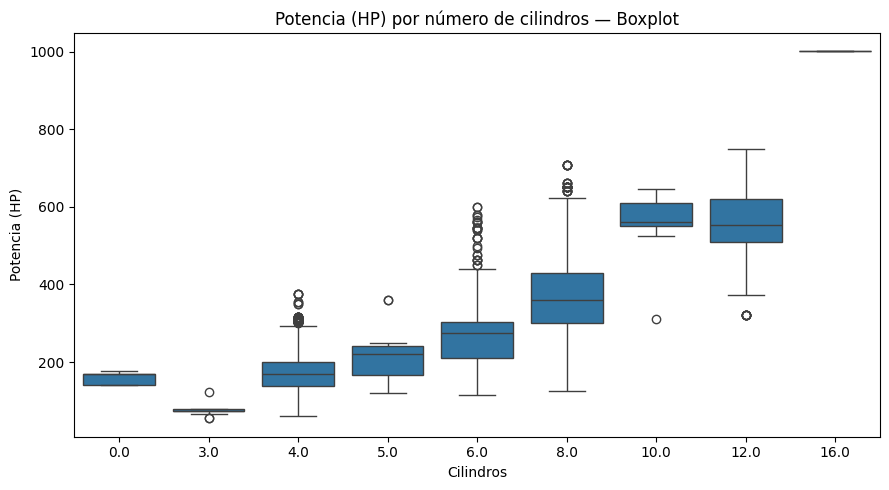

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df_autos, x="Cilindros", y="Potencia (HP)", showfliers=True)
plt.title("Potencia (HP) por número de cilindros — Boxplot")
plt.xlabel("Cilindros")
plt.ylabel("Potencia (HP)")
plt.tight_layout()
plt.show()

 Filtado

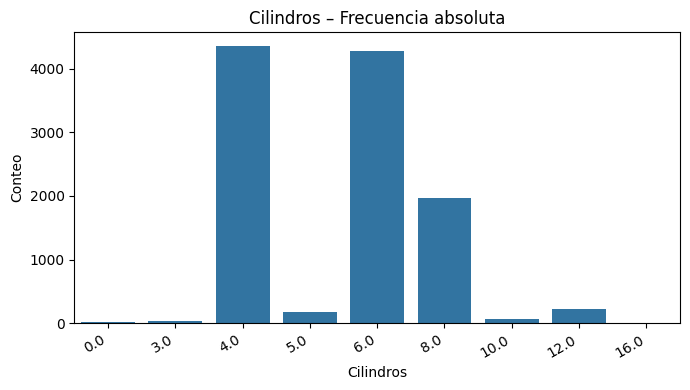

In [ ]:
# Barras (frecuencia absoluta)
plt.figure(figsize=(7,4))
sns.countplot(data=df_autos, x="Cilindros")
plt.title("Cilindros – Frecuencia absoluta")
plt.xlabel("Cilindros"); plt.ylabel("Conteo")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

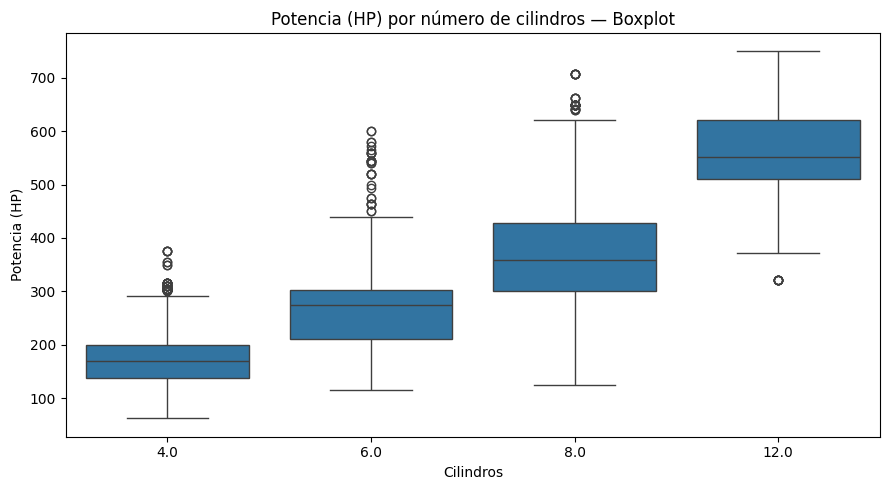

Cilindros
4.0     173.04
6.0     264.01
8.0     370.86
12.0    548.69
Name: Potencia (HP), dtype: float64


In [ ]:
cillist = [4,6,8,12]
df_filt_cil = df_autos[df_autos["Cilindros"].isin(cillist)]

plt.figure(figsize=(9, 5))
sns.boxplot(data=df_filt_cil, x="Cilindros", y="Potencia (HP)")
plt.title("Potencia (HP) por número de cilindros — Boxplot")
plt.xlabel("Cilindros")
plt.ylabel("Potencia (HP)")
plt.tight_layout()
plt.show()

medias = df_filt_cil.groupby("Cilindros")["Potencia (HP)"].mean()
print(medias.round(2))

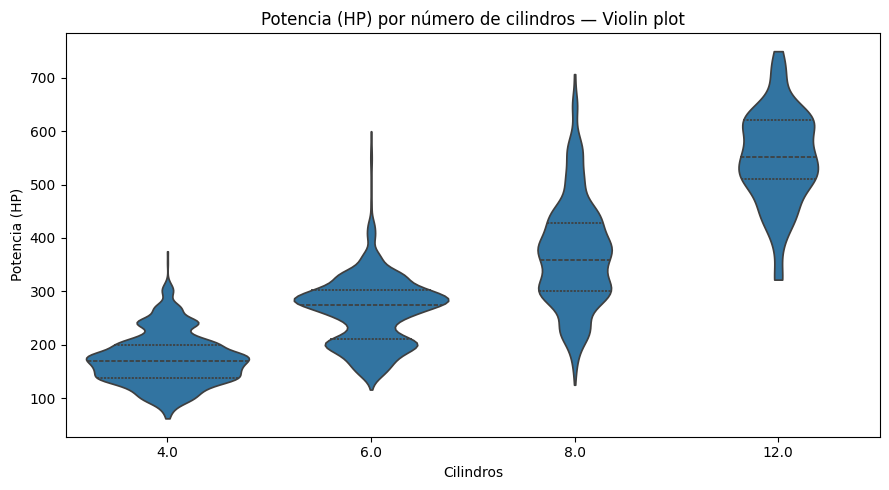

In [ ]:
plt.figure(figsize=(9, 5))
sns.violinplot(data=df_filt_cil, x="Cilindros", y="Potencia (HP)",
               inner="quartile", cut=0)
plt.title("Potencia (HP) por número de cilindros — Violin plot")
plt.xlabel("Cilindros")
plt.ylabel("Potencia (HP)")
plt.tight_layout()
plt.show()


## Relación categórica–categórica

In [ ]:
orden_tamano = ["Compact", "Midsize", "Large"]

cillist = [4,6,8]
df_filt_cil2 = df_autos[df_autos["Cilindros"].isin(cillist)]

In [ ]:
# Tabla de frecuencias absolutas
tabla_abs = pd.crosstab(df_filt_cil2["Cilindros"],
                        df_filt_cil2["Tamaño del vehículo"])
print("Frecuencias absolutas:\n", tabla_abs)

Frecuencias absolutas:
 Tamaño del vehículo  Compact  Large  Midsize
Cilindros                                   
4.0                     2888     77     1388
6.0                      933   1194     2145
8.0                      272   1288      405


In [ ]:
tabla_prop = pd.crosstab(df_filt_cil2["Cilindros"],
                         df_filt_cil2["Tamaño del vehículo"],
                         normalize="index")
print("Frecuencias relativa:\n", tabla_prop.round(2))

Frecuencias relativa:
 Tamaño del vehículo  Compact  Large  Midsize
Cilindros                                   
4.0                     0.66   0.02     0.32
6.0                     0.22   0.28     0.50
8.0                     0.14   0.66     0.21


Tamaño del vehículo  Compact  Large  Midsize
Cilindros                                   
4.0                     2888     77     1388
6.0                      933   1194     2145
8.0                      272   1288      405 



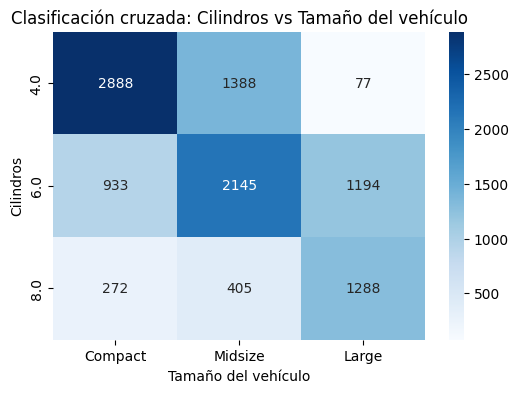

In [ ]:
# 1. Tabla de contingencia
tabla = pd.crosstab(df_filt_cil2["Cilindros"], df_filt_cil2["Tamaño del vehículo"])
print(tabla,'\n')

# 2. Heatmap de frecuencias absolutas
plt.figure(figsize=(6,4))
sns.heatmap(tabla[orden_tamano], annot=True, fmt="d", cmap="Blues")
plt.title("Clasificación cruzada: Cilindros vs Tamaño del vehículo")
plt.xlabel("Tamaño del vehículo")
plt.ylabel("Cilindros")
plt.show()

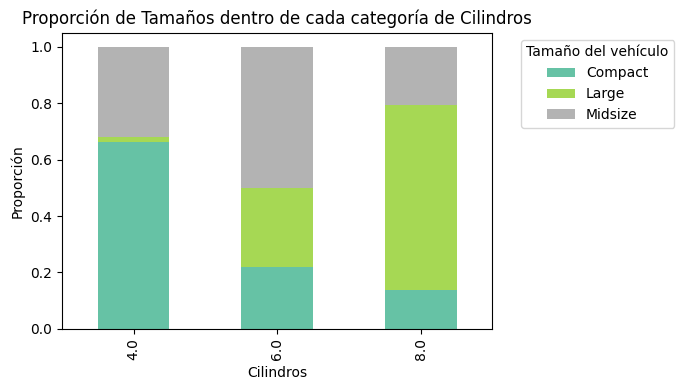

In [ ]:
# 3. Barras agrupadas (frecuencias relativas por tamaño)
prop = tabla.div(tabla.sum(axis=1), axis=0)  # proporciones fila
prop.plot(kind="bar", stacked=True, figsize=(7,4), colormap="Set2")
plt.title("Proporción de Tamaños dentro de cada categoría de Cilindros")
plt.ylabel("Proporción")
plt.xlabel("Cilindros")
plt.legend(title="Tamaño del vehículo", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

# Transformaciones de datos

In [ ]:
col = 'Potencia (HP)'

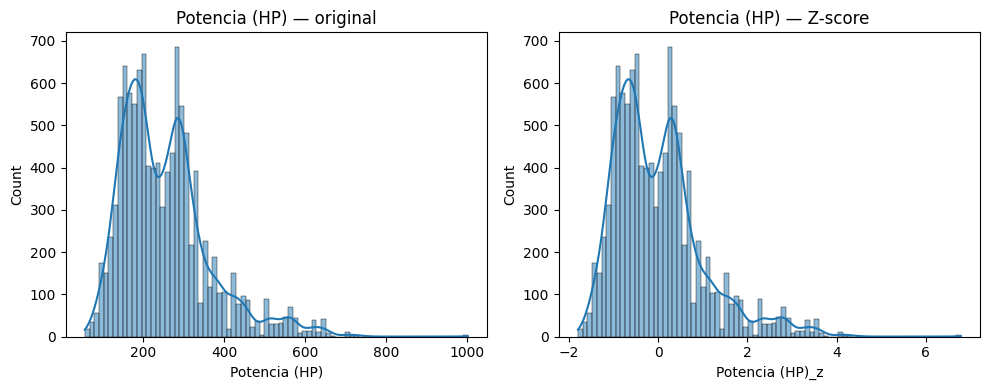

In [ ]:
# Z-score (estandarización) ---
mu = df_autos[col].mean()
sigma = df_autos[col].std(ddof=0)
df_autos[col + "_z"] = (df_autos[col] - mu) / sigma

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df_autos[col], kde=True, ax=ax[0])
ax[0].set_title("Potencia (HP) — original")

sns.histplot(df_autos[col + "_z"], kde=True, ax=ax[1])
ax[1].set_title("Potencia (HP) — Z-score")
plt.tight_layout()
plt.show()

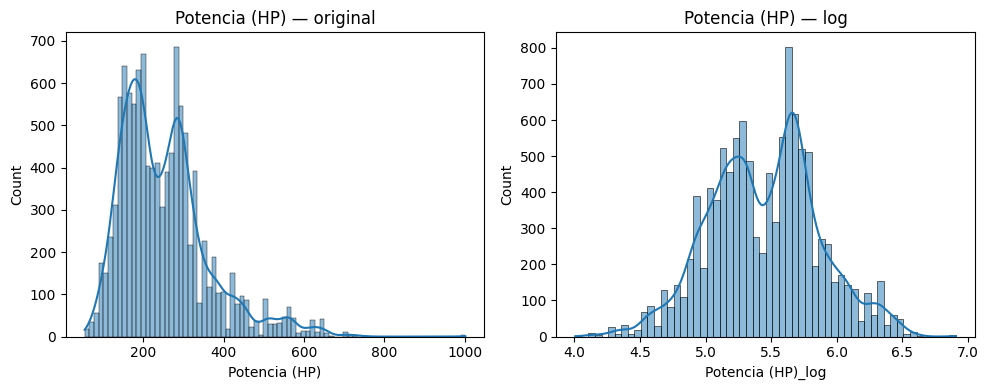

In [ ]:
# Logaritmo
df_autos[col + "_log"] = np.log(df_autos[col])

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df_autos[col], kde=True, ax=ax[0])
ax[0].set_title("Potencia (HP) — original")

sns.histplot(df_autos[col + "_log"], kde=True, ax=ax[1])
ax[1].set_title("Potencia (HP) — log")
plt.tight_layout()
plt.show()

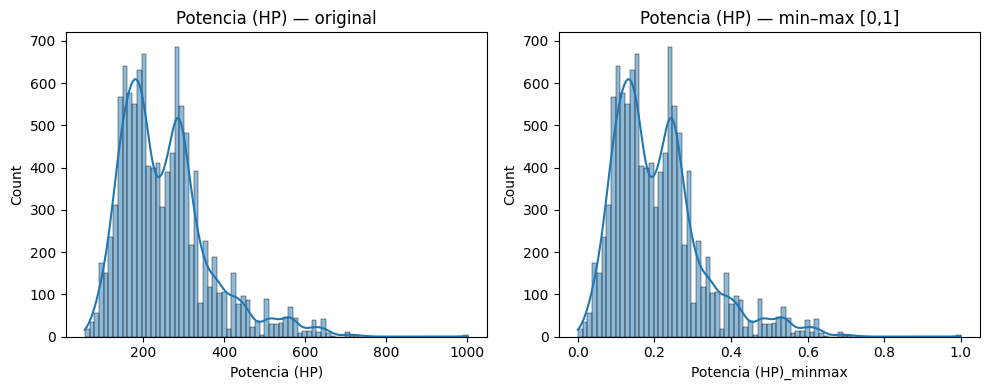

In [ ]:
# Min–Max (0 a 1)
xmin, xmax = df_autos[col].min(), df_autos[col].max()
df_autos[col + "_minmax"] = (df_autos[col] - xmin) / (xmax - xmin)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df_autos[col], kde=True, ax=ax[0])
ax[0].set_title("Potencia (HP) — original")

sns.histplot(df_autos[col + "_minmax"], kde=True, ax=ax[1])
ax[1].set_title("Potencia (HP) — min–max [0,1]")
plt.tight_layout()
plt.show()

# Datos correlacionados: Series de tiempo

## Dataset: Bicicletas Publicas
Recorridos realizados en 2024.

Son muchos datos, la descarga tarda un rato. Paciencia!

In [ ]:
import requests
import zipfile
import io

url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2024.zip"

# Descargar el archivo zip
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
csv_file_name = zip_file.namelist()[0]

# Leer el archivo CSV en un DataFrame
with zip_file.open(csv_file_name) as csvfile:
    df_bicicletas0 = pd.read_csv(csvfile)

In [ ]:
df_bicicletas = df_bicicletas0.copy()
print(len(df_bicicletas))

3559284


In [ ]:
df_bicicletas.columns

Index(['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen',
       'direccion_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'genero'],
      dtype='object')

In [ ]:
df_bicicletas.head(3)

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE


### Acondicionar el dataset

In [ ]:
# Renombrar columnas
df_bicicletas = df_bicicletas.rename(columns={'fecha_origen_recorrido': 'fecha',
                                              'nombre_estacion_origen':'origen',
                                              'nombre_estacion_destino':'destino',
                                              'duracion_recorrido': 'duracion',
                                              'genero_usuario': 'genero'})
# Filtrar columnas
df_bicicletas = df_bicicletas[['fecha','origen','destino','duracion','genero']]

# convierte la Fecha a tipo datatime
df_bicicletas['fecha'] = pd.to_datetime(df_bicicletas['fecha'])

In [ ]:
df_bicicletas.head(3)

,fecha,origen,destino,duracion,genero
0,2024-01-23 18:36:00,308 - SAN MARTIN II,055 - HABANA,568,MALE
1,2024-01-23 22:41:20,133 - BEIRO Y SEGUROLA,204 - Biarritz,1355,FEMALE
2,2024-01-23 20:06:22,328 - SARMIENTO II,006 - Parque Lezama,0,FEMALE


### Exploramos los datos

Agrupamos los viajes por hora y contamos cuántos se realizaron en cada franja horaria.

In [ ]:
df_bicicletas['fecha_h'] = df_bicicletas['fecha'].dt.round('h')
df_viajes_dia_hora = df_bicicletas.groupby(df_bicicletas['fecha_h']).size().reset_index(name='cantidad_viajes')
print(df_viajes_dia_hora.head())

              fecha_h  cantidad_viajes
0 2024-01-01 00:00:00               31
1 2024-01-01 01:00:00              148
2 2024-01-01 02:00:00              225
3 2024-01-01 03:00:00              175
4 2024-01-01 04:00:00              126


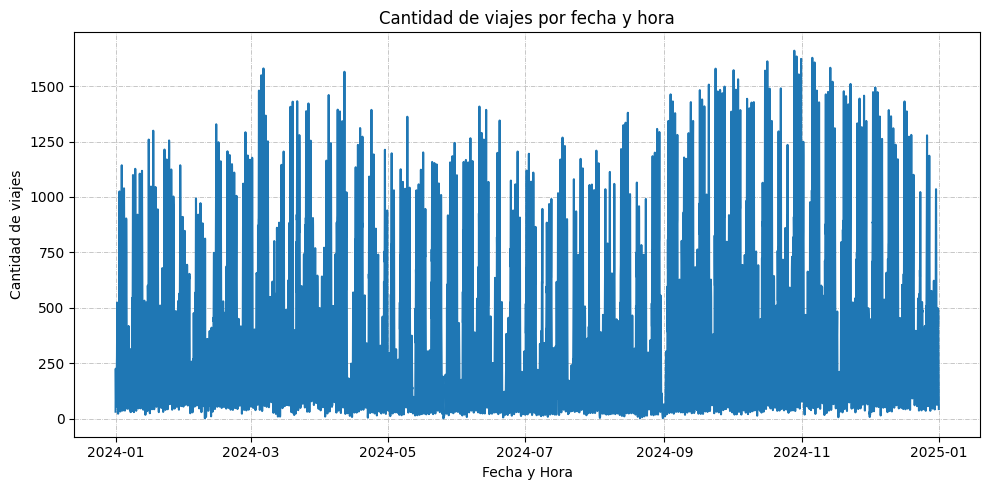

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_viajes_dia_hora, x='fecha_h', y='cantidad_viajes')
plt.title('Cantidad de viajes por fecha y hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de viajes')
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

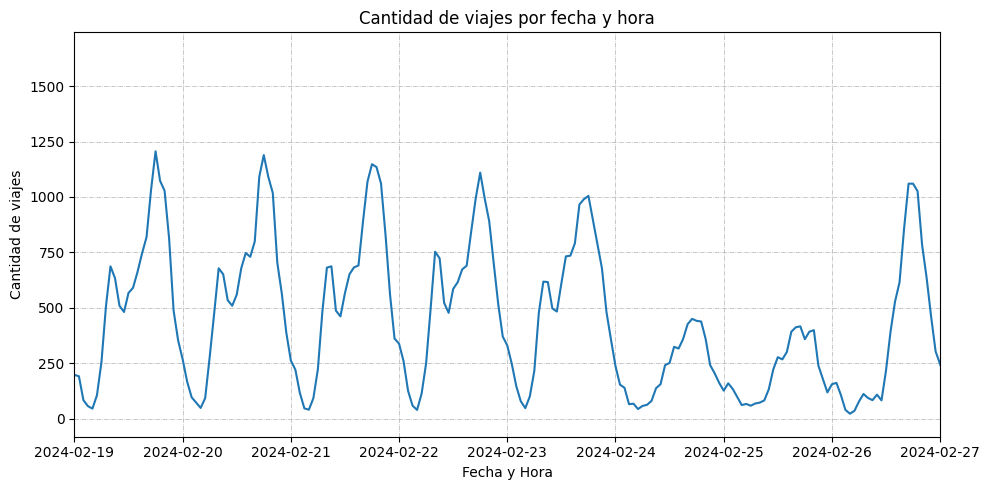

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_viajes_dia_hora, x='fecha_h', y='cantidad_viajes')
plt.title('Cantidad de viajes por fecha y hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de viajes')
# Zoom: para ver solo 8 dias
plt.xlim(df_viajes_dia_hora['fecha_h'][1175], df_viajes_dia_hora['fecha_h'][1175+8*24])
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

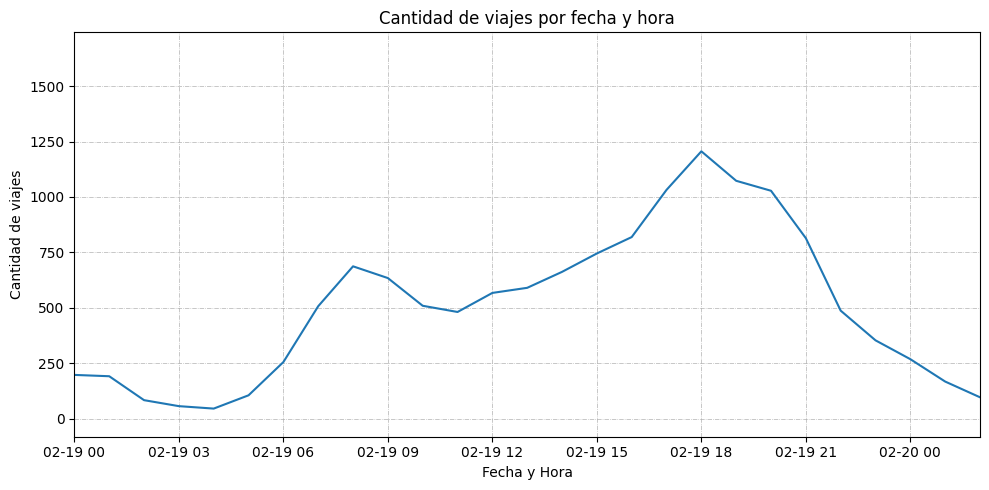

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_viajes_dia_hora, x='fecha_h', y='cantidad_viajes')
plt.title('Cantidad de viajes por fecha y hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de viajes')
# Zoom: para ver solo 26 horas
plt.xlim(df_viajes_dia_hora['fecha_h'][1175], df_viajes_dia_hora['fecha_h'][1175+26])
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

Segmentación por bloques / Resampleo → promedios mensuales


Idea general: partir una serie temporal en bloques de tiempo (días, meses, años) y calcular un resumen en cada bloque (promedio, suma, etc.).

In [ ]:
# Primero, tenemos que colocar la fecha como índice antes de remuestrar
df_viajes_mes = df_viajes_dia_hora[['fecha_h', 'cantidad_viajes']].set_index("fecha_h")
df_viajes_mes = df_viajes_mes.resample("ME").mean()[:-1]
df_viajes_mes.index -= pd.Timedelta(days=14)
df_viajes_mes.tail()

,cantidad_viajes
fecha_h,
2024-08-17,331.499327
2024-09-16,482.819444
2024-10-17,501.803763
2024-11-16,493.977778
2024-12-17,439.477151


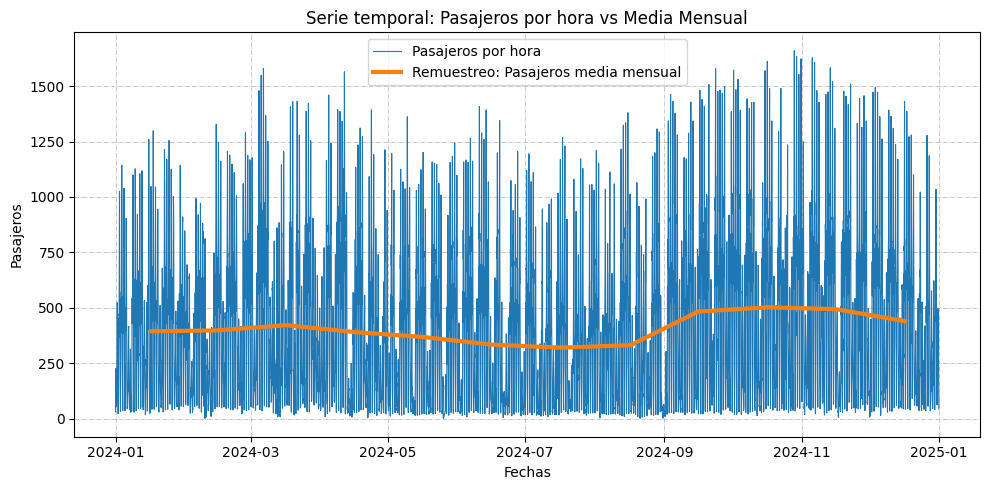

In [ ]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_viajes_dia_hora, x='fecha_h', y='cantidad_viajes', label='Pasajeros por hora',linewidth=0.8)\
   .set(title='Serie temporal: Pasajeros por hora vs Media Mensual', ylabel='Pasajeros', xlabel='Fechas')
sns.lineplot(data=df_viajes_mes, x='fecha_h', y='cantidad_viajes', label='Remuestreo: Pasajeros media mensual',linewidth=3)
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

### Medias móviles
suavizan y muestran tendencias

In [ ]:
df_viajes_MM_1D = df_viajes_dia_hora.copy()
df_viajes_MM_1D = df_viajes_MM_1D.set_index("fecha_h")

df_viajes_MM_1D['cantidad_viajes'] = df_viajes_MM_1D['cantidad_viajes'].rolling(24, center=True).mean()
df_viajes_MM_1D = df_viajes_MM_1D.dropna()
df_viajes_MM_1D.head()

df_viajes_MM_7D = df_viajes_dia_hora.copy()
df_viajes_MM_7D = df_viajes_MM_7D.set_index("fecha_h")
df_viajes_MM_7D['cantidad_viajes'] = df_viajes_MM_7D['cantidad_viajes'].rolling(7*24, center=True).mean()
df_viajes_MM_7D = df_viajes_MM_7D.dropna()

df_viajes_MM_1M = df_viajes_dia_hora.copy()
df_viajes_MM_1M = df_viajes_MM_1M.set_index("fecha_h")
df_viajes_MM_1M['cantidad_viajes'] = df_viajes_MM_1M['cantidad_viajes'].rolling(28*24, center=True).mean()
df_viajes_MM_1M = df_viajes_MM_1M.dropna()

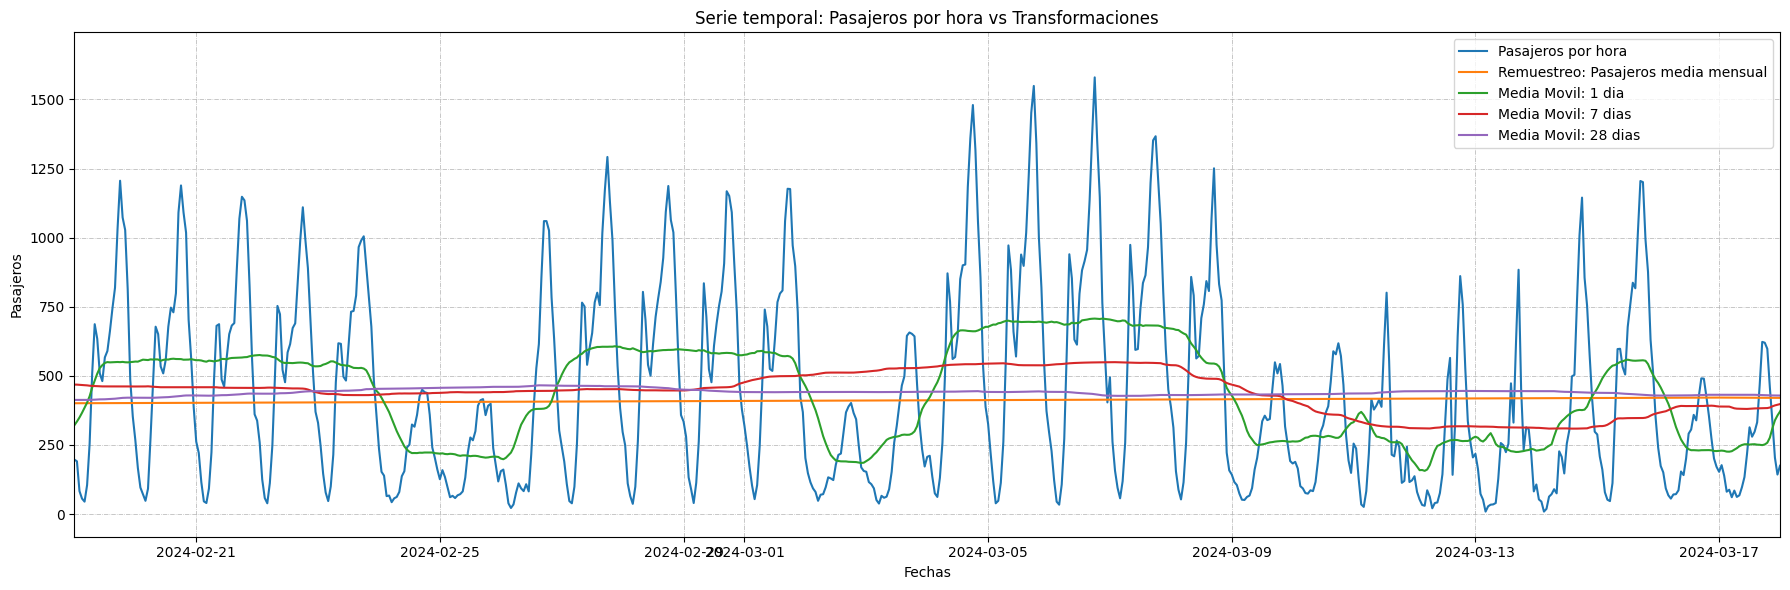

In [ ]:
plt.figure(figsize=(18, 6))

sns.lineplot(data=df_viajes_dia_hora, x='fecha_h', y='cantidad_viajes', label='Pasajeros por hora').set(title='Serie temporal: Pasajeros por hora vs Transformaciones', ylabel='Pasajeros', xlabel='Fechas')
sns.lineplot(data=df_viajes_mes, x='fecha_h', y='cantidad_viajes', label='Remuestreo: Pasajeros media mensual')
sns.lineplot(data=df_viajes_MM_1D, x='fecha_h', y='cantidad_viajes', label='Media Movil: 1 dia')
sns.lineplot(data=df_viajes_MM_7D, x='fecha_h', y='cantidad_viajes', label='Media Movil: 7 dias')
sns.lineplot(data=df_viajes_MM_1M, x='fecha_h', y='cantidad_viajes', label='Media Movil: 28 dias')

id0=1175
plt.xlim(df_viajes_dia_hora['fecha_h'][id0], df_viajes_dia_hora['fecha_h'][id0+24*28*1])
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

### Generar nuevas variables

In [ ]:
df_bicicletas['mes'] = df_bicicletas['fecha'].dt.month              # Extrae el número de mes (1=enero, 12=diciembre)
df_bicicletas['dia_semana'] = df_bicicletas['fecha'].dt.dayofweek   # Día de la semana (0=lunes, 6=domingo)
df_bicicletas['dia'] = df_bicicletas['fecha'].dt.day                # Día del mes (1 a 31 según el mes)
df_bicicletas['hora'] = df_bicicletas['fecha'].dt.hour              # Hora del día (0 a 23)

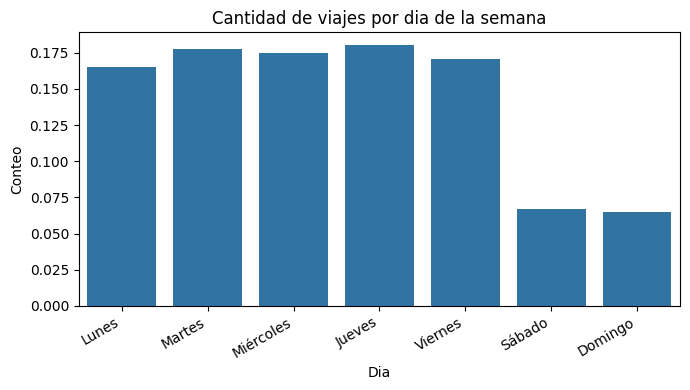

In [ ]:
df_viajes_x_dia_seman = df_bicicletas['dia_semana'].value_counts(normalize=True).to_frame()

day_names = {0: 'Lunes',1: 'Martes',2: 'Miércoles',
             3: 'Jueves',4: 'Viernes',5: 'Sábado',
             6: 'Domingo'}
df_viajes_x_dia_seman = df_viajes_x_dia_seman.rename(index=day_names)

plt.figure(figsize=(7,4))
sns.barplot(x=df_viajes_x_dia_seman.index, y=df_viajes_x_dia_seman["proportion"],order=day_names.values())
plt.title("Cantidad de viajes por dia de la semana")
plt.xlabel("Dia"); plt.ylabel("Conteo")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

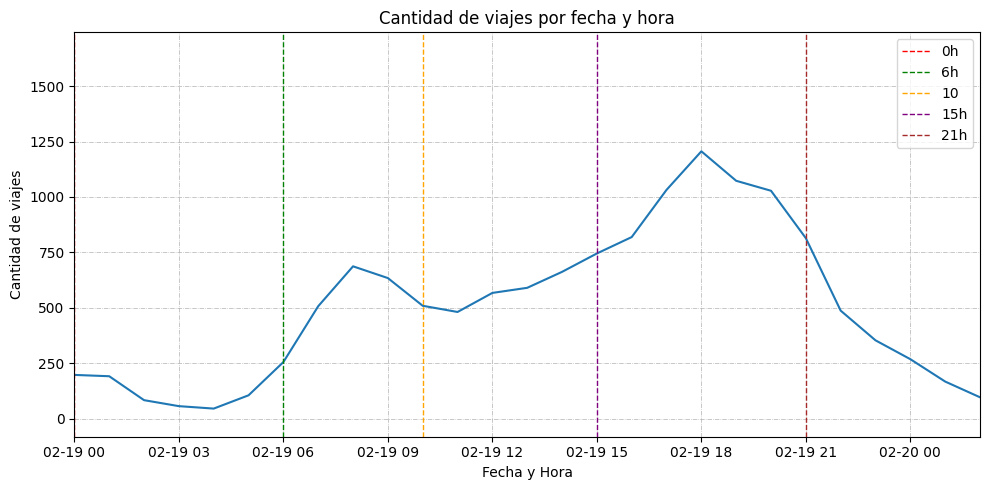

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_viajes_dia_hora, x='fecha_h', y='cantidad_viajes')
plt.title('Cantidad de viajes por fecha y hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de viajes')
# Zoom: para ver solo 26 horas
hora_cero = 1175
plt.xlim(df_viajes_dia_hora['fecha_h'][hora_cero], df_viajes_dia_hora['fecha_h'][hora_cero+26])
plt.grid(linestyle='-.', linewidth=0.5)

plt.axvline(df_viajes_dia_hora['fecha_h'][hora_cero], color='red', linestyle='--', linewidth=1, label='0h')
plt.axvline(df_viajes_dia_hora['fecha_h'][hora_cero+6], color='green', linestyle='--', linewidth=1, label='6h')
plt.axvline(df_viajes_dia_hora['fecha_h'][hora_cero+10], color='orange', linestyle='--', linewidth=1, label='10')
plt.axvline(df_viajes_dia_hora['fecha_h'][hora_cero+15], color='purple', linestyle='--', linewidth=1, label='15h')
plt.axvline(df_viajes_dia_hora['fecha_h'][hora_cero+21], color='brown', linestyle='--', linewidth=1, label='21h')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Create a new column for the moment of the day
conditions = [
    (df_bicicletas['hora'] >= 0) & (df_bicicletas['hora'] < 6),
    (df_bicicletas['hora'] >= 6) & (df_bicicletas['hora'] < 12),
    (df_bicicletas['hora'] >= 12) & (df_bicicletas['hora'] < 15),
    (df_bicicletas['hora'] >= 15) & (df_bicicletas['hora'] < 20),
    (df_bicicletas['hora'] >= 20) & (df_bicicletas['hora'] <= 23)
]

values = ["Madrugada", "Mañana", "Medio día", "Tarde", "Noche"]

df_bicicletas['momento_dia'] = np.select(conditions, values, default='Otro')
df_viajes_x_momento_dia = df_bicicletas['momento_dia'].value_counts(normalize=True).to_frame()
df_viajes_x_momento_dia

,proportion
momento_dia,
Tarde,0.404540
Mañana,0.219043
Medio día,0.173518
Noche,0.145899
Madrugada,0.057000


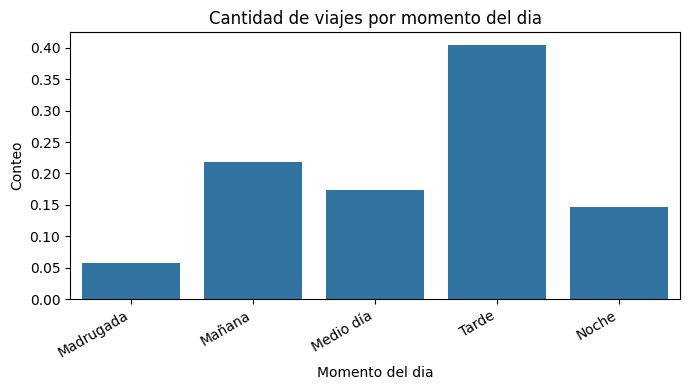

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x=df_viajes_x_momento_dia.index, y=df_viajes_x_momento_dia["proportion"],order  = values)
plt.title("Cantidad de viajes por momento del dia")
plt.xlabel("Momento del dia"); plt.ylabel("Conteo")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df_bicicletas["fin_de_semana"] = df_bicicletas["dia_semana"].isin([5, 6]).map({True: "Fin de semana", False: "Día de semana"})

In [ ]:
df_diasemana = df_bicicletas[df_bicicletas['fin_de_semana']=="Día de semana"]
df_findesemana = df_bicicletas[df_bicicletas['fin_de_semana']=="Fin de semana"]

In [ ]:
df_diasemana_x_momento_dia = df_diasemana['momento_dia'].value_counts(normalize=True).to_frame()
df_findesemana_x_momento_dia = df_findesemana['momento_dia'].value_counts(normalize=True).to_frame()

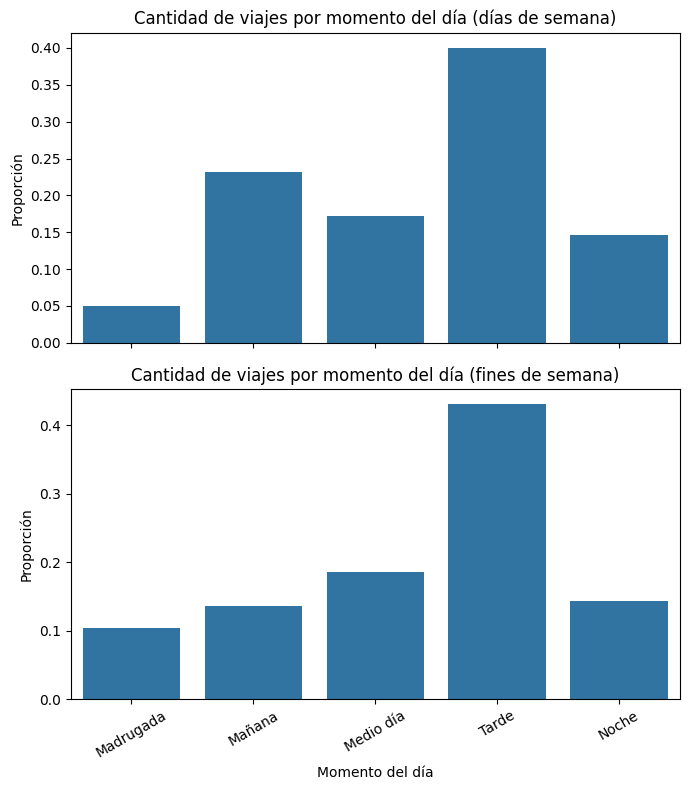

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)

# días de semana
sns.barplot(
    x=df_diasemana_x_momento_dia.index,
    y=df_diasemana_x_momento_dia["proportion"],
    order=values,
    ax=axes[0]
)
axes[0].set_title("Cantidad de viajes por momento del día (días de semana)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Proporción")
axes[0].tick_params(axis='x', rotation=30)

# fines de semana
sns.barplot(
    x=df_findesemana_x_momento_dia.index,
    y=df_findesemana_x_momento_dia["proportion"],
    order=values,
    ax=axes[1]
)
axes[1].set_title("Cantidad de viajes por momento del día (fines de semana)")
axes[1].set_xlabel("Momento del día")
axes[1].set_ylabel("Proporción")
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


### Agregar mas variables al análisis

Vacaciones (ej: invierno 15 al 26 de julio 2024)

In [ ]:
vacaciones_invierno = pd.date_range("2024-07-15", "2024-07-26")
df_bicicletas.loc[:, "vacaciones"] = df_bicicletas["fecha"].isin(vacaciones_invierno).map({True: "Vacaciones", False: "No vacaciones"})

Feriados

In [ ]:
feriados = pd.to_datetime([
    "2024-05-01",  # Día del trabajador
    "2024-12-25",  # Navidad
])
df_bicicletas.loc[:, "feriado"] = df_bicicletas["fecha"].isin(feriados).map({True: "Feriado", False: "No feriado"})

In [ ]:
df_bicicletas[["momento_dia","fin_de_semana","vacaciones","feriado"]].head(2)

# Extra

## Groupby

groupby en pandas permite dividir el dataset según una o varias categorías (por ejemplo, una marca, género o día de la semana) y luego aplicar funciones de agregación (como promedio, suma, mínimo, máximo, conteo, etc.) sobre cada grupo.

Por ejemplo, podemos:

In [ ]:
df_precio_por_marca = df_autos[df_autos['Año'] > 2000]\
                              .groupby('Marca')['Precio']\
                              .agg(['min', 'mean', 'max'])\
                              .sort_values(by='mean', ascending=False)\
                              .head(7)

print(df_precio_por_marca)

                 min          mean      max
Marca                                      
Bugatti      1500000  1.757224e+06  2065902
Maybach       366000  5.462219e+05  1382750
Rolls-Royce   219900  3.511306e+05   492425
Lamborghini   187900  3.315673e+05  1500000
Bentley       177500  2.471693e+05   363000
McLaren       184900  2.398050e+05   280225
Ferrari       140615  2.373838e+05   643330


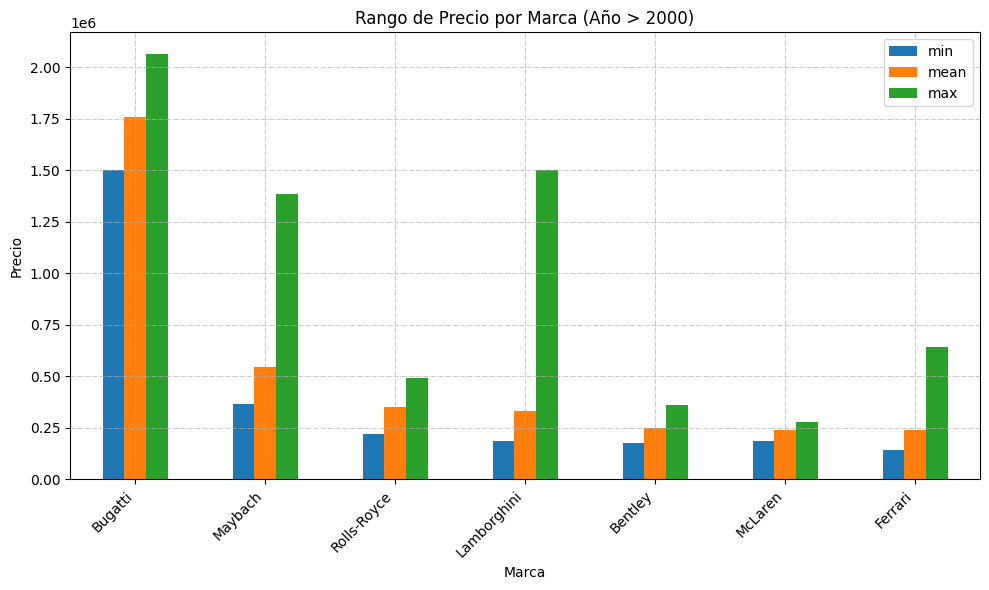

In [ ]:
df_precio_por_marca.plot(kind='bar', figsize=(10, 6))
plt.title('Rango de Precio por Marca (Año > 2000)')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

Otras ideas:

In [ ]:
# 2. Cantidad de modelos por tipo de transmisión
df_autos.groupby("Transmisión")["Modelo"].nunique()

,Modelo
Transmisión,
AUTOMATED_MANUAL,90
AUTOMATIC,718
DIRECT_DRIVE,4
MANUAL,344
UNKNOWN,5


In [ ]:
# 3. Potencia promedio y máxima por marca
df_autos.groupby("Marca")["Potencia (HP)"].agg(["mean", "max"]).sort_values("mean", ascending=False).head(10)

,mean,max
Marca,,
Bugatti,1001.000000,1001.0
Lamborghini,614.076923,750.0
McLaren,610.400000,641.0
Maybach,590.500000,631.0
Bentley,533.851351,631.0
Ferrari,509.911765,731.0
Rolls-Royce,487.548387,624.0
Aston Martin,483.758242,568.0
Maserati,419.545455,523.0


In [ ]:
# 4. Consumo promedio en ciudad y en ruta según el tamaño del vehículo
df_autos.groupby("Tamaño del vehículo")[["Rendimiento ciudad (MPG)", "Rendimiento carretera (MPG)"]].mean().round(2)

,Rendimiento ciudad (MPG),Rendimiento carretera (MPG)
Tamaño del vehículo,,
Compact,21.58,28.49
Large,15.62,22.01
Midsize,19.27,26.69


In [ ]:
# 5. Precio promedio por estilo de vehículo
df_autos.groupby("Estilo del vehículo")["Precio"].mean().sort_values(ascending=False).head(10).round(0)

,Precio
Estilo del vehículo,
Convertible,88217.0
Coupe,78293.0
4dr SUV,40736.0
Sedan,40175.0
Crew Cab Pickup,37183.0
Passenger Van,30578.0
Passenger Minivan,26152.0
Wagon,26084.0
Extended Cab Pickup,23042.0


## Autocor

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL

In [ ]:
path = kagglehub.dataset_download("rakannimer/air-passengers")
print("Path:", path)

100%|██████████| 764/764 [00:00<00:00, 701kB/s]

Extracting files...
Path: /root/.cache/kagglehub/datasets/rakannimer/air-passengers/versions/1


In [ ]:
path = kagglehub.dataset_download("rakannimer/air-passengers")
print("Path:", path)
data = pd.read_csv(path + "/AirPassengers.csv")
print(data.head())

Path: /kaggle/input/air-passengers
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [ ]:
print(data.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [ ]:
data = data.rename(columns={'Month':'fecha','#Passengers':'CANTIDAD'})
data['fecha'] = pd.to_datetime(data['fecha'])
data = data.set_index('fecha')

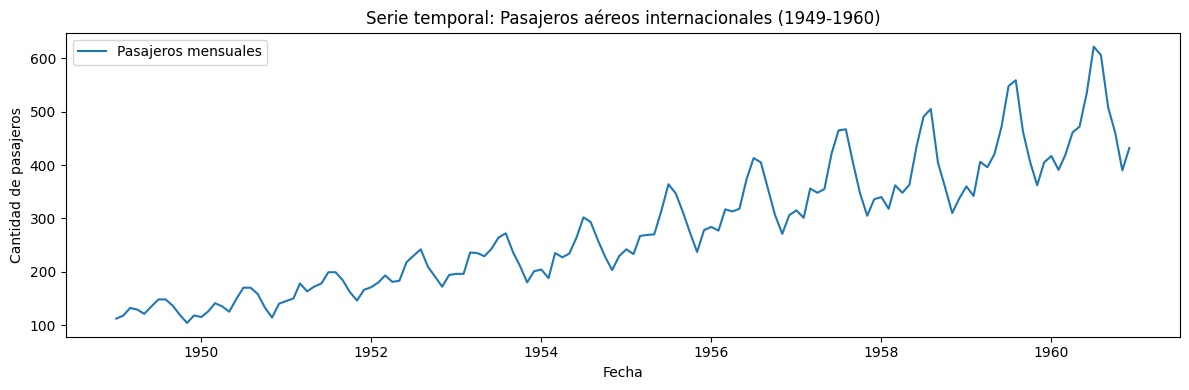

In [ ]:
# Serie original
plt.figure(figsize=(12,4))
plt.plot(data.index, data['CANTIDAD'], label='Pasajeros mensuales')
plt.title("Serie temporal: Pasajeros aéreos internacionales (1949-1960)")
plt.xlabel("Fecha"); plt.ylabel("Cantidad de pasajeros")
plt.legend(); plt.tight_layout()
plt.show()

<Figure size 700x400 with 0 Axes>

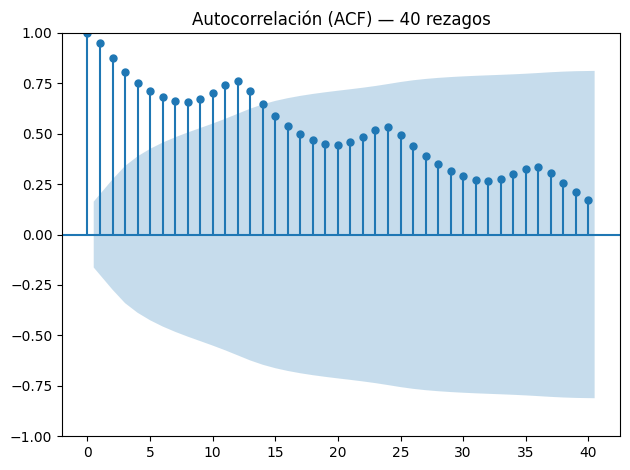

In [ ]:
# ACF
plt.figure(figsize=(7,4))
plot_acf(data['CANTIDAD'], lags=40)
plt.title('Autocorrelación (ACF) — 40 rezagos')
plt.tight_layout()
plt.show()

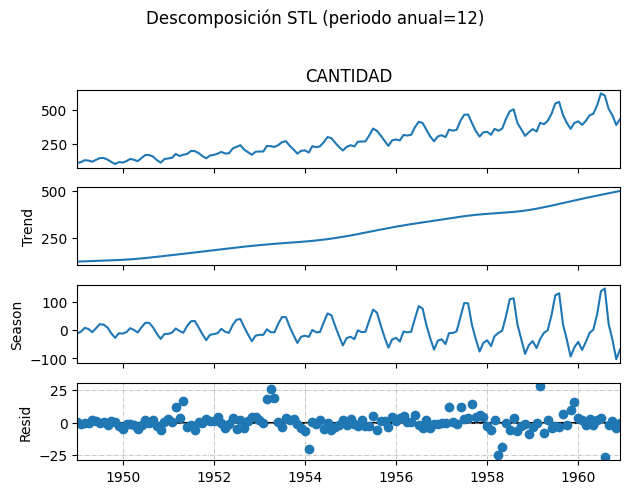

In [ ]:
# STL descomposición
stl = STL(data['CANTIDAD'], period=12, robust=True).fit()
stl.plot()
plt.suptitle('Descomposición STL (periodo anual=12)', y=1.02)
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()